## Question, Deadline-October 7 11.59pm
In this exercise you will write a python-program that reads the image gingerbread.jpg and that makes a threshold using the  Otsu algorithm (Links to an external site.). https://en.wikipedia.org/wiki/Otsu%27s_method

You will use this skeleton program in Python. It consists of one function making a histogram, one that carries out the Otsu thresholding and one function that uses this to make a binary image. 

 

Hand in the python code and the results when applied on the image on Canvas

Otsu thresholding: http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html

##  The question structure given by the professor

In [3]:

# def threshold(image, th=None):
#     """Returns a binarised version of given image, thresholded at given value.

#     Binarises the image using a global threshold `th`. Uses Otsu's method
#     to find optimal thrshold value if the threshold variable is None. The
#     returned image will be in the form of an 8-bit unsigned integer array
#     with 255 as white and 0 as black.

#     Parameters:
#     -----------
#     image : np.ndarray
#         Image to binarise. If this image is a colour image then the last
#         dimension will be the colour value (as RGB values).
#     th : numeric
#         Threshold value. Uses Otsu's method if this variable is None.

#     Returns:
#     --------
#     binarised : np.ndarray(dtype=np.uint8)
#         Image where all pixel values are either 0 or 255.
#     """
#     # Setup
#     shape = np.shape(image)
#     binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)

#     if len(shape) == 3:
#         image = image.mean(axis=2)
#     elif len(shape) > 3:
#         raise ValueError('Must be at 2D image')

#     if th is None:
#         th = otsu_thval(image)

#     # Start thresholding
#     ## WRITE YOUR CODE HERE


#     return binarised


# def histogram(image):
#     """Returns the image histogram with 256 bins.
#     """
#     # Setup
#     shape = np.shape(image)
#     histogram = np.zeros(256)

#     if len(shape) == 3:
#         image = image.mean(axis=2)
#     elif len(shape) > 3:
#         raise ValueError('Must be at 2D image')

#     # Start to make the histogram
#     ## WRITE YOUR CODE HERE

#     return histogram


# def otsu(image):
#     """Finds the optimal thresholdvalue of given image using Otsu's method.
#     """
#     hist = histogram(image)
#     th = 0

#     ## WRITE YOUR CODE HERE

#     return th




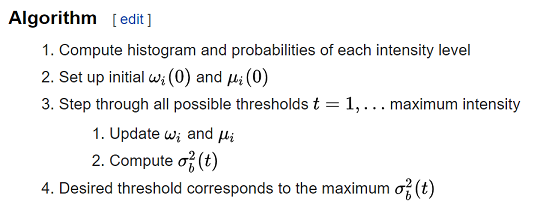


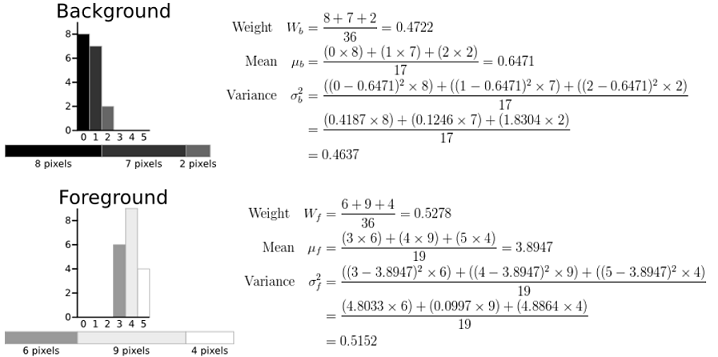


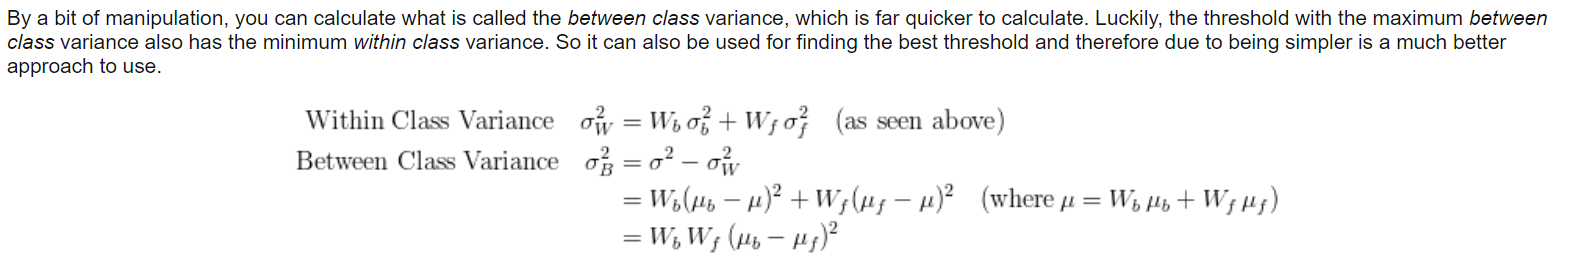

## Solution starts here

In [4]:
# -*- coding: utf-8 -*-

"""
Skeleton for first part of the blob-detection coursework as part of INF250
at NMBU (Autumn 2017).
"""

__author__ = "Mahrin Tasfe"
__email__ = "mahrin.tasfe@nmbu.no"

# importing all the necessary modules
import numpy as np
from skimage import io
import matplotlib.pyplot as plt



In [5]:
def get_image(name):
    """ Using the skimage.io import the image with the file name.
    This function returns the color image as numpy array """
    
    #Getting the image  
    filename = '../Images/'+name
    image = io.imread(filename)


    return image

In [6]:
image = get_image("gingerbreads.jpg")

In [7]:
def show_image(image, label ="Image:"):
    """This function shows/plots the given image."""
    plt.subplots(1,1,figsize=(10,6))
    plt.title(label = label, fontsize=12)
    plt.imshow(image, cmap='gray') 
    plt.show()

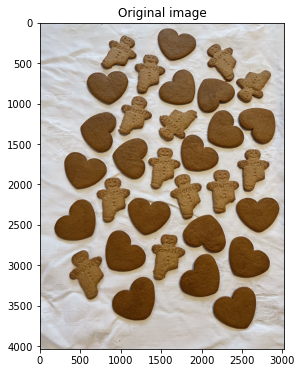

In [8]:
show_image(image, "Original image")

In [9]:
def histogram(image):
    """Returns the image histogram with 256 bins.
    """
    # Setup
    shape = np.shape(image)
    histogram = np.zeros(256)

    if len(shape) == 3:#making sure it is a color/RGB image
        image = image.mean(axis=2)# EI LINE BUJHI NAI
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    # Start to make the histogram
    ## WRITE YOUR CODE HERE

    shape = np.shape(image)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(image[i,j])
            histogram[pixval] += 1


    return histogram

In [10]:
def show_histogram(histogram):
    """This function plots the given histogram (in the numpy array format)"""
    plt.figure()       
    plt.title(label="histogram of image with 256 bins", fontsize=12)
    plt.plot(histogram)
    plt.show()

Type: <class 'numpy.ndarray'>


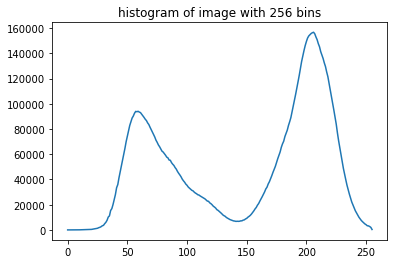

In [11]:
histogram_ans = histogram(image)
print("Type:", type(histogram_ans))
show_histogram(histogram_ans)
# print("histogram_ans", histogram_ans)


In [12]:
def otsu(image):
    #theory source: http://www.labbookpages.co.uk/software/imgProc/otsuThreshold.html
    """Finds the optimal threshold value of given image using Otsu's method.
    """
    hist = histogram(image) #Obtaining the histogram of the image
    th = 0

    ## WRITE YOUR CODE HERE
    max_t = 0
    weight_denominator = sum(hist)
    max_between_class_variance = 0
    for t in range(1, 256):# skipping the 1st iteration t = 0, 
        #because it will generate a division by zero error while calculating the means u_b & u_f
        
#         print("for the value of t ", t)
        w_b_top = sum(hist[0:t+1])
        w_b = w_b_top/weight_denominator
#         print("w_b ", w_b )
        
        u_b_top = 0
        u_b_bottom = 0
        for i in range(0, t+1):
            u_b_top += (i*hist[i])
            u_b_bottom+= (hist[i])
#         print("u_b_top", u_b_top, "u_b_bottom", u_b_bottom)
        u_b = u_b_top/u_b_bottom
#         print("u_b", u_b)   
            
        w_f_top = sum(hist[t:256])
        w_f = w_f_top/weight_denominator            
#         print("w_f", w_f)
        
        u_f_top = 0
        u_f_bottom = 0
        for i in range(t, 256):
            u_f_top += (i*hist[i])
            u_f_bottom+= hist[i]
        u_f = u_f_top/u_f_bottom
#         print("u_f", u_f)
        
        current_between_class_variance = w_b*w_f*((u_b - u_f)**2)
#         print("current_between_class_variance", current_between_class_variance)
        
        if t == 1:
            # If it is the 1st iteration, putting the 1st value as max
            if not np.isnan(current_between_class_variance):
                max_between_class_variance = current_between_class_variance
                max_t = t
        else:
            #except for the 1st iteration, comparing the current between variance with the maximamum. 
            #and updating the max between variance
            if not np.isnan(current_between_class_variance):
                if(max_between_class_variance < current_between_class_variance):
                    max_between_class_variance = current_between_class_variance
                    max_t = t  
#                     print("T=", t, "updating max_between New value", max_between_class_variance)
#         print("max_t", max_t, "max_between_class_variance", max_between_class_variance)   
#         print("==============================================")
    
#     print("max_t", max_t)
    return max_t

In [13]:
print("The optimal Otsu threshold value:", otsu(get_image("gingerbreads.jpg")))

The optimal Otsu threshold value: 138


In [17]:
def threshold(image, th=None):
    """Returns a binarised version of given image, thresholded at given value.

    Binarises the image using a global threshold `th`. Uses Otsu's method
    to find optimal thrshold value if the threshold variable is None. The
    returned image will be in the form of an 8-bit unsigned integer array
    with 255 as white and 0 as black.

    Parameters:
    -----------
    image : np.ndarray
        Image to binarise. If this image is a colour image then the last
        dimension will be the colour value (as RGB values).
    th : numeric
        Threshold value. Uses Otsu's method if this variable is None.

    Returns:
    --------
    binarised : np.ndarray(dtype=np.uint8)
        Image where all pixel values are either 0 or 255.
    """
    # Setup
    shape = np.shape(image)
    print("Original image shape", shape, "shape[0]", shape[0], "shape[1]", shape[1])
    binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)
    print("BEFORE binarised.size", np.shape(binarised))

    show_image(image, "Original image BEFORE MEAN")
    if len(shape) == 3:# checking for 3 channels or RGB/color image
        image = image.mean(axis=2) ###,..EI LINE BUJHTESI NAH
        #axis = 0 means along the column and axis = 1 means working along the row.
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    if th is None:
        th = otsu(image)
     
    show_image(image, "Original image AFTER MEAN")
    # Start thresholding
    ## WRITE YOUR CODE HERE
    
    #binarising the image
    image[image > th] = 255
    image[image != 255] = 0
    binarised = image
    
    print("AFTER binarised.size", np.shape(binarised))


    return binarised

Original image shape (4032, 3024, 3) shape[0] 4032 shape[1] 3024
BEFORE binarised.size (4032, 3024)


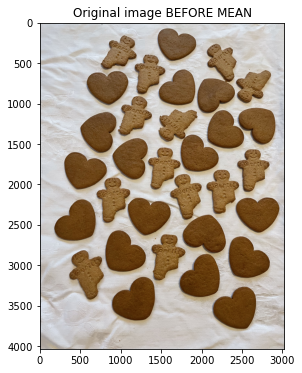

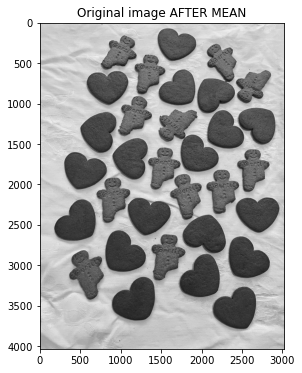

AFTER binarised.size (4032, 3024)


In [18]:
binary_image_ans = threshold(get_image("gingerbreads.jpg"))

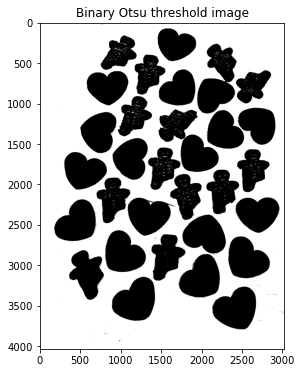

In [16]:
show_image(binary_image_ans, "Binary Otsu threshold image")